# K Nearest Neighbors



The basic K-nearest neighbor classification algorithm performs a search through the training samples, computing the distance for each training sample from the sample to be classified. Once the distances are computed the class of the majority of the k closest points is assigned as the classification of the test sample.

## Discuss:
Suppose we have <i>m</i> samples for training and <i>n</i> samples for testing, there are _d_ features.

What needs to be done for the training phase with a KNN model? What is the time complexity of the training phase?

What needs to be done for the testing/classification phase with a KNN model? What is the time complexity to classify one sample? *n* samples?
<font color='red'>
- given one sample to predict, O(d) to compute distance to one training example
<br>
- O(md) to compute distance to all training examples
<br>
- from the calculated distances to all *m* training samples, loop once to find the smallest O(m),
<br>
- loop the list of calculated distances for *k* times to get the *k* closest training samples O(mk). [we can definitely do better than this!]
<br>
- O(md + mk) [for classifying one sample]
<br>
- O(nm(d + k)) [n sample for testing]
</font>

How will a larger training set impact the training time and testing time for a KNN model?


Why do we want to choose a smaller K if we can?




***********************************************************************************************************
Have to calculate a total distance from 1 Sample to ALLL the POSSIBLE SAMPLES IN THE TRAINING DATASET
	
    But each training instance is a vector
	
    So it has a vector of D FEATURES


	
	And each testing sample is D FEATURES
		So from one training sample to one testing sample is
	 O(d) == O(number of features)
	From one testing sample to ALL the training samples (to determine which one is closest) is 
	O(md) == O(number of training samples*number of features)
	
	So get one big vector (all the distances): this is considered an UNSORTED list
		so have to iterate over list, pick lowest number (take it out): that is O(m)
			Then have to do Again and again until you have your K (number of K nearest neighbors).
	O(mk)==O(number of training samples * number of nearest neighbors)
	
	
	Add them all together: O(md+mk)
		Time complexity to predict ONE sample for K-nearest neighbor
		
	O(nm(d+k)) Time complexity for predicting N sampesl 
	

How will a larger training set impact the training time and testing time for KNN Model?
	For the training part, there is almost no work to be done. 
	If you have a larger training set (M value) large, then testing time is slower. 
	If you have millions of records, you don't have to use all the records.

Why do we want to choose a smaller K if we can?
	Don't want K to be too big (5, 7 better than 100) because prediction time 
	Makes the testing/training time slower. 
	
Overall we want reasonably small training set. We want small k that doesn't hurt accuracy. 
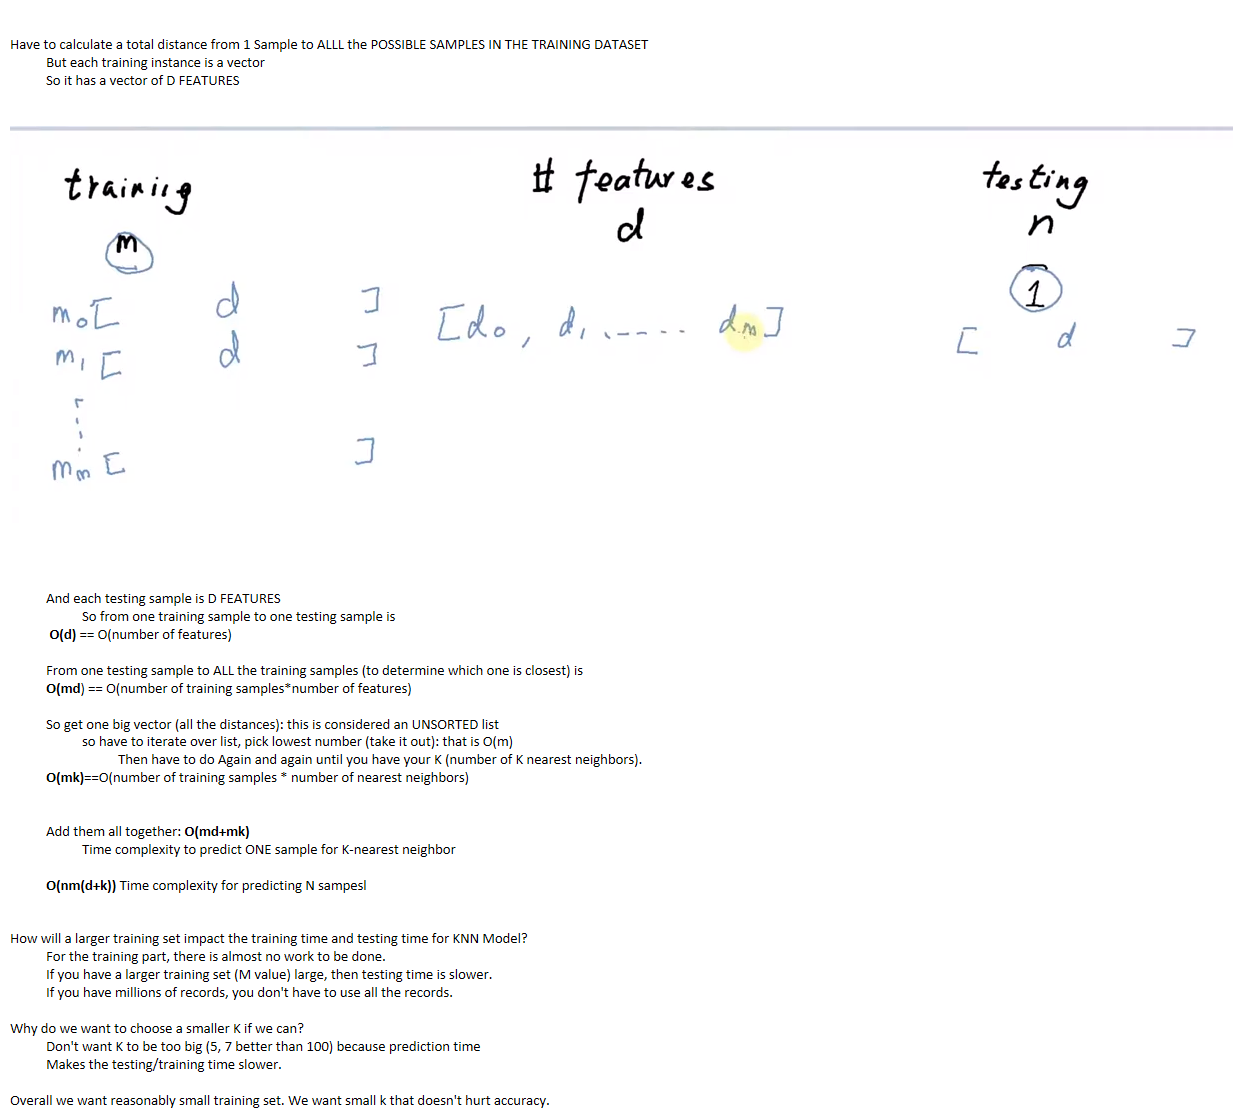

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

**********************************************************************************************************************
When doing K nearest Neighbor, always relying on some type of distance measures. <br>
    Feature one: range 0-1 <br>
    Feature two: range 0-100<br>
       When calculate distance between these two features: see that feature 2 will dominate distances for all samples<br>
           Want features to be treated equally 
 
 So we need to SCALE THE DATA
    

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("datasets/Classified_Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler() #standardscaler is class name. make scaler= for instance of this class. 

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1)) #only want to scale target

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# perform the standardization to all the features of the dataset
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
# Re-create the feature dataframe
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1]) #now put scaled features (2D array) Back into Dataframe
df_feat.head() #using all column names except last column (target names, bc don't have that one)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# try k =1 first, then we will use elbow method to choose the k value
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
pred = knn.predict(X_test)

In [16]:
# predicted values, 0s and 1s as we expected, but not so readable...
pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], d

## Predictions and Evaluations

Let's evaluate our KNN model!

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[136  19]
 [ 13 132]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       155
           1       0.87      0.91      0.89       145

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In this dataset, standardization lowers the performance of the KNN classifier. Since this is an anonymized dataset, it is not clear whether standardization is a good idea... In real-world projects, talk to the clients or the domain people!

### Discuss: break a tie

In what condition are we likely to see ties in KNN? Is this possible to see ties when we use an odd K value?


Have two nearest neighbors, how do we label tie?<br>
N1 says yes N2 says no. Who wins?<br>
Weight hyperparameter: how do you weight different neighbors
        
Say to weight   distance. Distance 1 is smaller than D2, so Yes would win. 

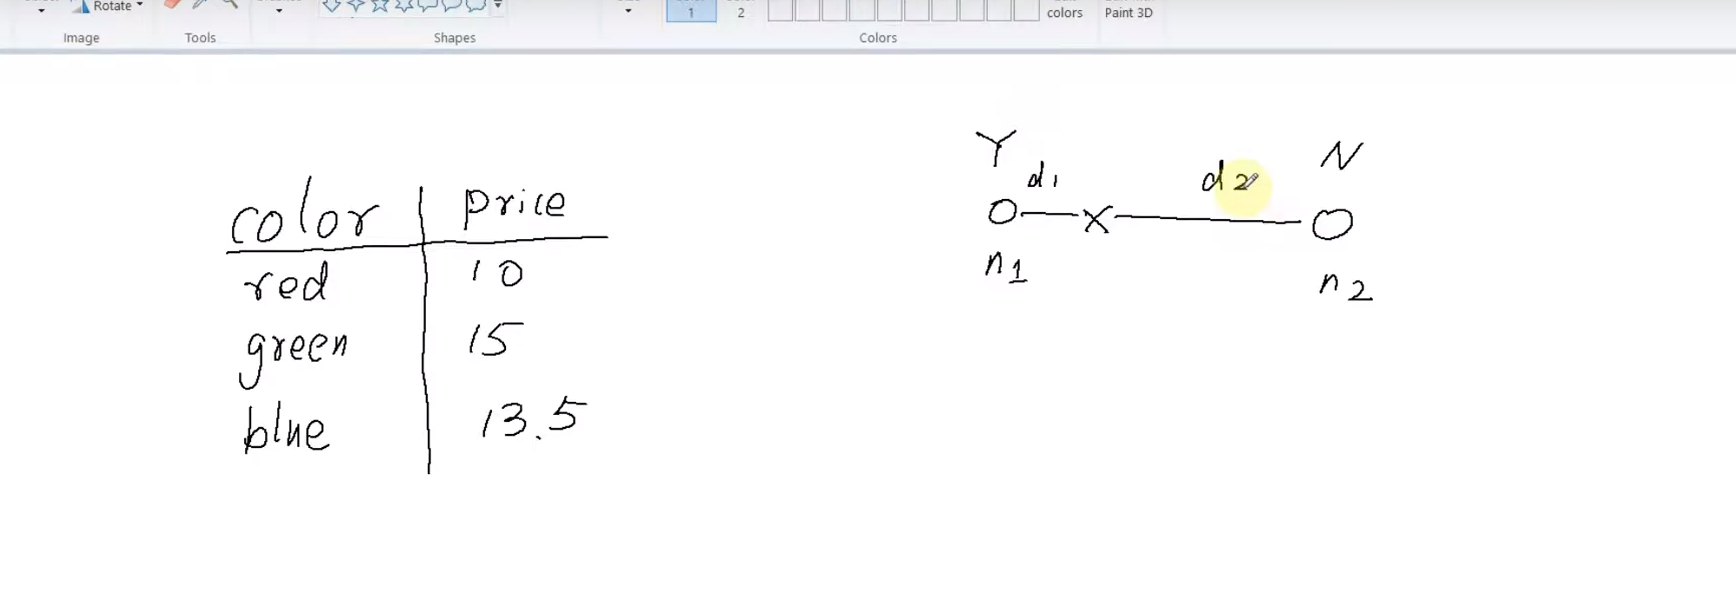

###  What can be done with  factor  (string)  features?
Most  statistical and machine learning models require this type of variable to be converted to a series of binary dummy variables conveying the same information.
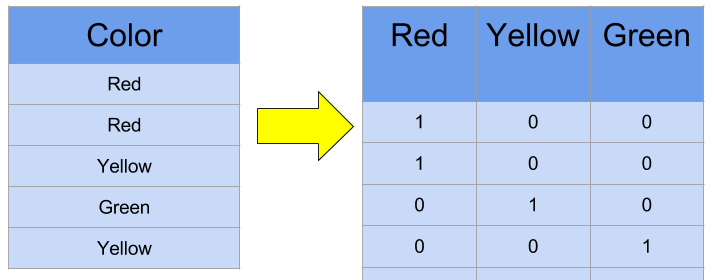

The  phrase  **one  hot  encoding**  comes  from  digital  circuit  terminology, where it describes circuit settings in which only one bit is allowed to be positive (hot).

In [ ]:
#Transform categorical feature (color) into three different columns, can get rid of COLOR column.


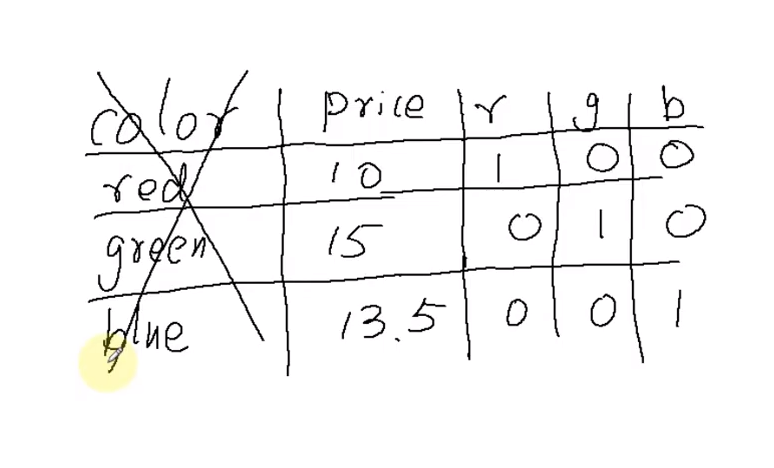
In this one you have to scale Price for sure 

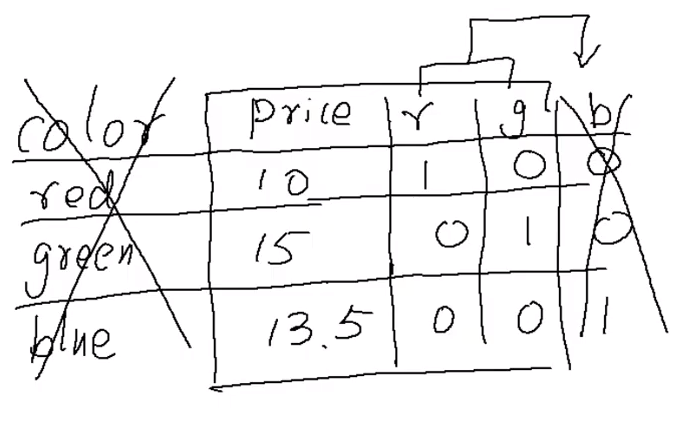
Don't really need blue, because red and green can predict color. 

### Lending club data
We need to use both **Standardization** and **One Hot Encoder** in this case.

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [20]:
%matplotlib inline
loans = pd.read_csv('datasets/loan_data.csv')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [21]:
loans.head() #want to predict not.fully.paid

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [24]:
cat_feats = ['purpose']
# drop_first parameter: Whether to get k-1 dummies out of k categorical levels by removing the first level.
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True) 
#loans is name of df. specify columns want to do one-Hot_encoding to. Drop first=True to drop it;
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Exercise:
Now we have applied the **One Hot Encoder** to the "purpose" column. Please continue this project and do the following steps:

1) use StandardScaler to standardize the data (but put the 'not.fully.paid' column aside)

2) name the preprocessed data frame "scaled_features"

3) do the train-test split with test_size=0.30, random_state=101

4) create a knn classifier with n=1, and predict the values for 'not.fully.paid' column.

5) also try n=3 and 5, will the performance be improved?

In [32]:
# create a scaler and fit the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# perform the standardization to all the features of the dataset
scaled_features = scaler.fit_transform(final_data.drop('not.fully.paid',axis=1))

# check the scaled_features
scaled_features

# what data type is scaled_features now?
#nested listed

array([[ 0.49222226, -0.13931753,  2.46309947, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [ 0.49222226, -0.57886837, -0.43885443, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [ 0.49222226,  0.48648368,  0.23070836, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       ...,
       [-2.03160257, -0.57886837, -1.06867038, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [-2.03160257,  1.39166043,  0.1569135 , ...,  3.77191529,
        -0.21864717, -0.26285458],
       [-2.03160257,  0.61685894,  2.58060136, ..., -0.2651173 ,
        -0.21864717, -0.26285458]])

In [33]:
# The np array is hard to read, we really want to change the scaled_features back into a data frame.
# Get the column names from final_data and name it "columns"

columns = list(final_data.columns)

# remove the 'not.fully.paid' from the "columns" list
columns.remove('not.fully.paid')

# check "columns", now we can use those feature names to re-create the scaled_features as a data frame
columns

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [35]:
# Re-create the feature dataframe,
# you can call pd.DataFrame with two parameters, first parameter is scaled_features, the second parameter is "columns = columns"

scaled_features = pd.DataFrame(scaled_features,columns=columns) #now put scaled features (2D array) Back into Dataframe

# check the first 5 rows of the scaled_features
scaled_features.head() #using all column names except last column (target names, bc don't have that one)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855


In [46]:
# train-test split
from sklearn.model_selection import train_test_split
#X = scaled_features
#y = loans['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(scaled_features,loans['not.fully.paid'],
                                                    test_size=0.30)


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Create KNN Model
knn = KNeighborsClassifier(n_neighbors=1)

#Train Model
knn.fit(X_train,y_train)

#Make predictions
pred = knn.predict(X_test)

#make confusion Matrix:
print(confusion_matrix(y_test,pred))

#make classification report
print(classification_report(y_test,pred))

#268: we predict those to not be fully paid, but actually they are. So false positives. 
#404: predict those will be fully paid, but they actually don't pay up,  false negative
    #in our evaluations they are evaluated at same rate: but should weigh false negative better. 


[[2095  268]
 [ 404  107]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2363
           1       0.29      0.21      0.24       511

    accuracy                           0.77      2874
   macro avg       0.56      0.55      0.55      2874
weighted avg       0.74      0.77      0.75      2874



## To sum up:
- KNN is sensitive to the scale of features
    - apply StandardScaler first
- factor  (string)  variables cannot be used directly in most of the statistical ML models
    - remove them if they are not important
    - or converted to a series of binary dummy variables conveying the same information (one hot encoding)